In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats 

import matplotlib.pyplot as plt 
import geopandas as gpd

In [3]:
over_dose = pd.read_csv("files/fataloverdoses2.csv")
map_df = gpd.read_file('files/fataloverdoses2.csv')

In [4]:
ag = pd.read_csv("files/fataloverdoses2.csv", usecols = ['age','case_year'])
ag
#dataframe narrowed to age and case year

,age,case_year
0,31.0,2013
1,38.0,2013
2,51.0,2013
3,60.0,2013
4,58.0,2013
...,...,...
5336,55.0,2021
5337,40.0,2020
5338,44.0,2020
5339,52.0,2020


In [5]:
over_dose['age'].value_counts()

51.0    166
34.0    158
52.0    153
30.0    153
29.0    151
       ... 
72.0      1
78.0      1
12.0      1
83.0      1
85.0      1
Name: age, Length: 73, dtype: int64

In [6]:
over_dose['case_year'].value_counts()

2017    739
2016    646
2020    543
2019    495
2018    432
2015    422
2014    306
2012    286
2013    269
2011    259
2008    231
2010    224
2007    223
2009    219
2021     47
Name: case_year, dtype: int64

In [7]:
over_dose.loc["2013":"2015", "age"]

2013    53.0
2014    35.0
2015    63.0
Name: age, dtype: float64

In [8]:
fif = over_dose.loc[over_dose['case_year'] == 2015]

In [9]:
thir = over_dose.loc[over_dose['case_year'] == 2013]

In [10]:
fou = over_dose.loc[over_dose['case_year'] == 2014]

In [11]:
type(fou)

pandas.core.frame.DataFrame

In [12]:
years = (thir, fou, fif)

In [13]:
yea = [thir, fou, fif]

years = pd.concat(yea)
years

,death_date_and_time,manner_of_death,age,sex,race,case_dispo,combined_od1,combined_od2,combined_od3,combined_od4,combined_od5,combined_od6,combined_od7,combined_od8,combined_od9,combined_od10,incident_zip,decedent_zip,case_year
0,2013-06-22T18:33:00,Accident,31.0,M,W,MO,HEROIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15122,NaN,2013
1,2013-06-21T10:05:00,Accident,38.0,F,W,MO,CLONA,HEROIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15212,NaN,2013
2,2013-06-10T18:07:00,Accident,51.0,M,W,MO,ALCOHO,DIAZEP,HYDROO,OXYCOD,NaN,NaN,NaN,NaN,NaN,NaN,15214,NaN,2013
3,2013-08-06T09:48:00,Accident,60.0,F,W,MO,COCAIN,DIPHEN,QUETIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15202,NaN,2013
4,2013-07-27T16:39:00,Accidents,58.0,F,W,MO,ALCOHO,CHLORD,COCAIN,OXYCOD,NaN,NaN,NaN,NaN,NaN,NaN,15239,NaN,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5231,2015-01-10T10:40:00,Accident,45.0,F,B,MO,COCAIN,FENTAN,MORPHI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15219,NaN,2015
5232,2015-01-21T15:11:00,Accident,66.0,M,B,MO,FENTAN,METHAD,MORPHI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15214,NaN,2015
5233,2015-01-20T11:06:00,Accidents,52.0,M,B,MO,COCAIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15104,NaN,2015
5260,2015-01-12T13:05:00,Accident,49.0,M,W,MO,HEROIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15024,NaN,2015


In [14]:
years["age"].mean()
#median age of death from overdoses 2013 to 2015

41.39317953861585

In [15]:
individ = years.index
incidents = len(individ)
incidents
#how many individuals died from overdoes between 2013 and 2015

997

In [16]:
raceW = years.loc[years['race'] == "W"]
raceMW = raceW.loc[raceW['sex'] == "M"]
raceMW
#dataframe narrowed down by white men

,death_date_and_time,manner_of_death,age,sex,race,case_dispo,combined_od1,combined_od2,combined_od3,combined_od4,combined_od5,combined_od6,combined_od7,combined_od8,combined_od9,combined_od10,incident_zip,decedent_zip,case_year
0,2013-06-22T18:33:00,Accident,31.0,M,W,MO,HEROIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15122,NaN,2013
2,2013-06-10T18:07:00,Accident,51.0,M,W,MO,ALCOHO,DIAZEP,HYDROO,OXYCOD,NaN,NaN,NaN,NaN,NaN,NaN,15214,NaN,2013
69,2013-12-08T06:17:00,Accident,52.0,M,W,MO,BUPROP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15222,NaN,2013
70,2013-12-21T15:12:00,Accident,64.0,M,W,MO,ALCOHO,HEROIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15108,NaN,2013
103,2013-12-16T18:34:00,Accident,52.0,M,W,MO,ALCOHO,MORPHI,OXYCOD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15202,NaN,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5099,2015-09-30T12:38:00,Accident,59.0,M,W,MO,ALCOHO,COCAIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15207,NaN,2015
5228,2015-01-01T18:24:00,Accident,28.0,M,W,MO,HEROIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15210,NaN,2015
5229,2015-01-26T10:53:00,Accident,46.0,M,W,MO,HEROIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15227,NaN,2015
5230,2015-01-19T12:15:00,Accident,26.0,M,W,MO,ALCOHO,HEROIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15224,NaN,2015


In [17]:
raceB = years.loc[years['race'] == "B"]
raceMB = raceB.loc[raceB['sex'] == "M"]
raceMB
#dataframe narrowed by black men

,death_date_and_time,manner_of_death,age,sex,race,case_dispo,combined_od1,combined_od2,combined_od3,combined_od4,combined_od5,combined_od6,combined_od7,combined_od8,combined_od9,combined_od10,incident_zip,decedent_zip,case_year
286,2013-04-23T10:55:00,Accidents,67.0,M,B,MO,ALCOHO,HEROIN,HYDROO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15122,NaN,2013
287,2013-05-09T23:01:00,Accident,50.0,M,B,MO,ALCOHO,HEROIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15219,NaN,2013
409,2013-12-06T16:36:00,Accident,19.0,M,B,MO,COCAIN,HEROIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15237,NaN,2013
821,2013-02-15T12:09:00,Accident,56.0,M,B,MO,ALCOHO,COCAIN,MORPHI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15235,NaN,2013
1335,2013-12-01T09:48:00,Accidents,52.0,M,B,MO,COCAIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15219,NaN,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5142,2015-10-15T09:43:00,Accident,33.0,M,B,MO,ALCOHO,HEROIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15212,NaN,2015
5222,2015-01-06T17:33:00,Accident,45.0,M,B,MO,HEROIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15226,NaN,2015
5232,2015-01-21T15:11:00,Accident,66.0,M,B,MO,FENTAN,METHAD,MORPHI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15214,NaN,2015
5233,2015-01-20T11:06:00,Accidents,52.0,M,B,MO,COCAIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15104,NaN,2015


In [18]:
menW = len(raceMW)
menW
#number of white men who died via overdose from 2013-2015

591

In [19]:
menB = len(raceMB)
menB
#number of black men who died via overdose from 2013-2015

98

In [20]:
raceWM13 = raceMW.loc[raceMW['case_year'] == 2013]
raceWM14 = raceMW.loc[raceMW['case_year'] == 2014]
raceWM15 = raceMW.loc[raceMW['case_year'] == 2015]
white_deaths = [raceWM13, raceWM14, raceWM15]
#white men deaths narrowed to each year
raceMB13 = raceMB.loc[raceMB['case_year'] == 2013]
raceMB14 = raceMB.loc[raceMB['case_year'] == 2014]
raceMB15 = raceMB.loc[raceMB['case_year'] == 2015]
black_deaths = [raceMB13, raceMB14, raceMB15]
#black men deaths narrowed to each year

races = [raceWM13, raceWM14, raceWM15, raceMB13, raceMB14, raceMB15]
races_2 = pd.concat(races)
#dataset combining deaths of white men and black men for year range

In [21]:
WD = pd.concat(white_deaths)
#dataframe of white male deaths during year range
BD = pd.concat(black_deaths)
#dataframe of black male deaths during year range

In [22]:
wdd = WD.set_index('case_year')
bdd = BD.set_index('case_year')
wbdd = [wdd, bdd]
full_chart = pd.concat(wbdd)


In [23]:
full_chart2 = full_chart[['age', 'race']]
full_chart2

,age,race
case_year,,
2013,31.0,W
2013,51.0,W
2013,52.0,W
2013,64.0,W
2013,52.0,W
...,...,...
2015,33.0,B
2015,45.0,B
2015,66.0,B


In [24]:
full_chart2.loc[full_chart2["race"] == "W"]

,age,race
case_year,,
2013,31.0,W
2013,51.0,W
2013,52.0,W
2013,64.0,W
2013,52.0,W
...,...,...
2015,59.0,W
2015,28.0,W
2015,46.0,W


In [25]:
mask1 = years['race'] == 'W'
years[mask1].std()['age']

12.078556598902166

In [26]:
mask2 = years['race'] =='B'
years[mask2].std()['age']

12.199828724024053

In [27]:
years[years['race'] == 'B'].mean()['age']
#average age of all black overdose vicitms

49.666666666666664

In [28]:
years[years['race'] == 'W'].mean()['age']
#average age of all white overdose victims

40.04778554778555

In [29]:
full_chart2.groupby('race').mean()
#average age of men at death by overdose split by race

,age
race,
B,49.27551
W,39.76819


In [30]:
MW_age = raceMW["age"].mean()
#average age of white men who died for all years

In [31]:
MW = raceMB["age"].mean()
#average age of black men who died for all years

In [32]:
thir_count = thir.loc[thir['race'] == "W"]
fou_count = fou.loc[fou['race'] == "W"]
fif_count = fif.loc[fif['race'] == "W"]
#how many white people died each year

In [33]:
thir_countB = thir.loc[thir['race'] == "B"]
fou_countB = fou.loc[fou['race'] == "B"]
fif_countB = fif.loc[fif['race'] == "B"]
#how many black people died each year

In [34]:
thir_countWC = thir_count.loc[thir_count['sex'] == "M"]
fou_countWC = fou_count.loc[fou_count['sex'] == "M"]
fif_countWC = fif_count.loc[fif_count['sex'] == "M"]
#how manny white men died each year

In [35]:
thir_countBC = thir_countB.loc[thir_countB['sex'] == "M"]
fou_countBC = fou_countB.loc[fou_countB['sex'] == "M"]
fif_countBC = fif_countB.loc[fif_countB['sex'] == "M"]
#how many black men died each year

In [36]:
thir_agesB = thir_countBC["age"].mean()
thir_agesW = thir_countWC["age"].mean()
fou_agesB = fou_countBC["age"].mean()
fou_agesW = fou_countWC["age"].mean()
fif_agesB = fif_countBC["age"].mean()
fif_agesW = fif_countWC["age"].mean()
#average age of death for either black men or white men separated by year

In [37]:
final2013 = [thir_agesB, thir_agesW]
final2014 = [fou_agesB, fou_agesW]
final2015 = [fif_agesB, fif_agesW]
final16 = [2013, 2014, 2015]

In [43]:
final_A = [final2013, final2014, final2015]
chart_A = pd.DataFrame(final_A, columns = ['Black Men', 'White Men'], index = [2013, 2014, 2015])
chart_A

,Black Men,White Men
2013,48.777778,39.987421
2014,50.666667,39.544944
2015,48.585366,39.787402


Text(0, 0.5, 'Average Age')

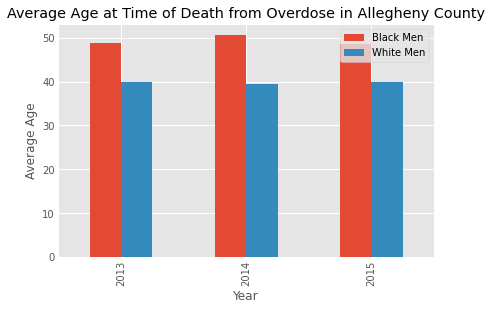

In [47]:
import matplotlib
plotdata = pd.DataFrame(chart_A)
# Plot a bar chart
matplotlib.style.use('g')
plotdata.plot(kind="bar")
plt.title("Average Age at Time of Death from Overdose in Allegheny County")
plt.xlabel("Year")
plt.ylabel("Average Age")